In [51]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
sys.path.insert(0, '/home/sudat/athena/vis/python')
import athena_read

In [52]:
data = athena_read.athdf(f'/home/sudat/cpd_test/jupiter_adiabatic/disk.out1.01083.athdf')
dens = data.get('rho')[0]
r_c = data.get('x1v')
theta_c = data.get('x2v')
phi_c = data.get('x3v')
phi_f = data.get('x3f')
theta_f = data.get('x2f')
r_f = data.get('x1f')
v_r = data.get('vel1')
v_theta = data.get('vel2')
v_phi = data.get('vel3')
temp = data.get('press')/dens

In [53]:
#sigma = data.get('Sigma_a_0')
#opacity = sigma/dens

In [54]:
R_C, THETA_C = np.meshgrid(r_c, theta_c)
X_C = R_C*np.sin(THETA_C)
Z_C = R_C* np.cos(THETA_C)

In [55]:
R_F, THETA_F = np.meshgrid(r_f, theta_f)
X_F = R_F*np.sin(THETA_F)
Z_F = R_F* np.cos(THETA_F)

In [56]:
v_r2d = v_r[0]
v_theta2d = v_theta[0]
v_phi2d = v_phi[0]

$$v_x = v_r \sin\theta \cos\varphi + v_{\theta} \cos\theta \cos\varphi + v_{\varphi} \sin\varphi$$
$$v_z = v_r \cos\theta + v_{\theta} \sin\theta$$

In [57]:
v_x = v_r2d*np.sin(THETA_C)*np.cos(phi_c) + v_theta2d*np.cos(THETA_C)*np.cos(phi_c)
v_z = v_r2d*np.cos(THETA_C) + v_theta2d*np.sin(THETA_C)

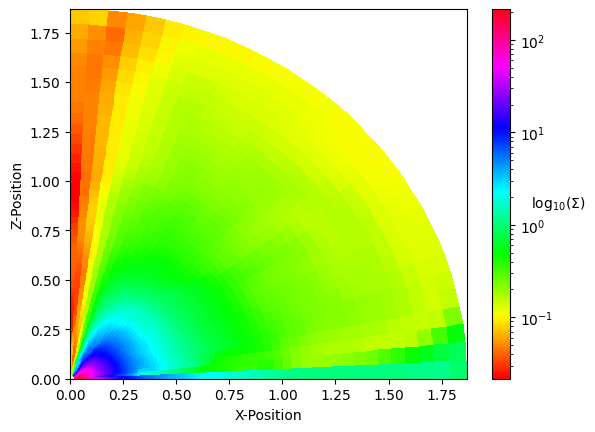

In [58]:
plt.pcolormesh(X_F, Z_F, dens, cmap='hsv', norm='log')
plt.xlabel('X-Position')
plt.ylabel('Z-Position')
#plt.xlim([0.02,1])
#plt.ylim([0.02,1])
plt.colorbar().set_label(r'log$_{10}(\Sigma)$', rotation=0)

#plt.contour(X_C,Z_C, np.log(dens), 5)
#plt.quiver(X_C, Z_C, v_x, v_z)

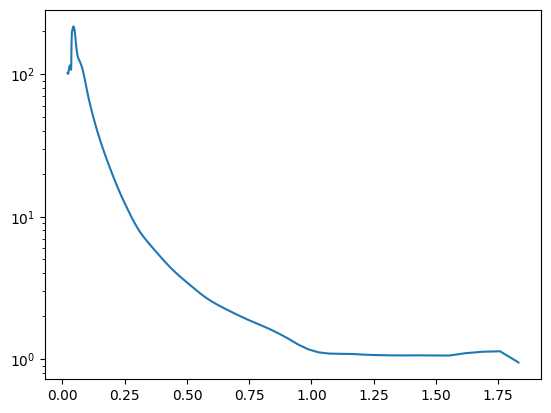

In [59]:
plt.plot(r_c, dens[-1])

plt.yscale('log')

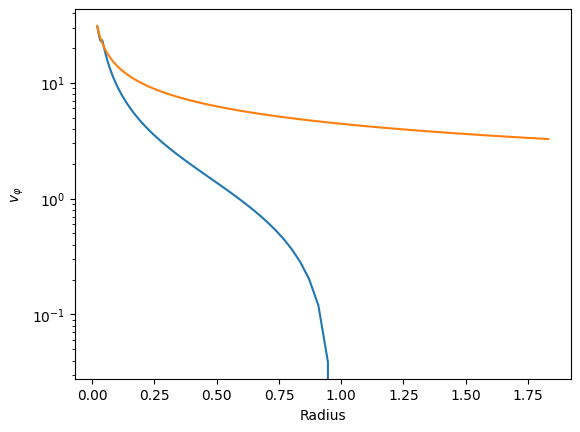

In [65]:
plt.plot(r_c, v_phi[0][-1])
plt.xlabel(r'Radius')
plt.ylabel(r'$v_{\varphi}$')

x=np.linspace(0,100,100)
plt.plot(r_c, np.sqrt(19.58/r_c))

plt.yscale('log')

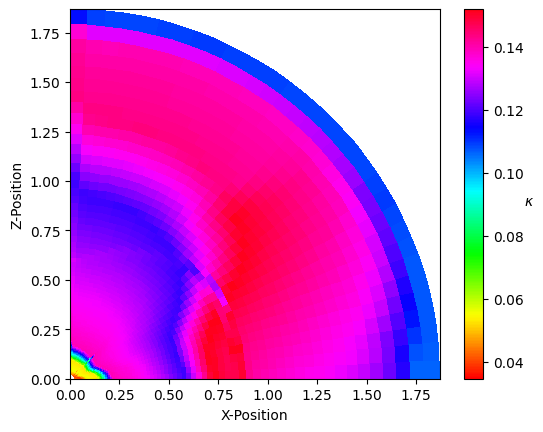

In [61]:
plt.pcolormesh(X_F, Z_F, opacity[0], cmap='hsv')
plt.xlabel('X-Position')
plt.ylabel('Z-Position')
plt.axis('square')

plt.colorbar().set_label(r'$\kappa$', rotation=0)

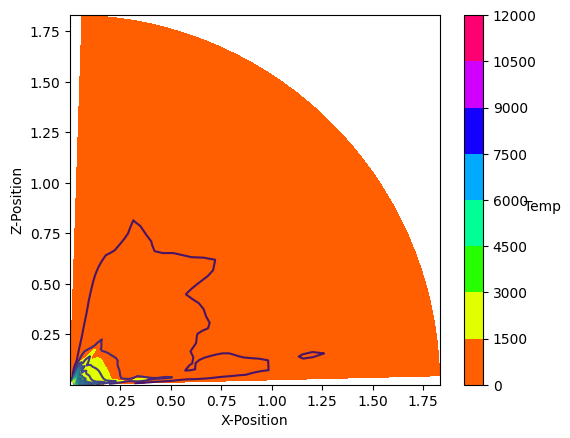

In [62]:
plt.contourf(X_C, Z_C, (66.0*temp[0]), cmap='hsv')
plt.xlabel('X-Position')
plt.ylabel('Z-Position')
plt.axis('square')
plt.colorbar().set_label(r'Temp', rotation=0)


plt.contour(X_C,Z_C, (66.0*temp[0]), 20)

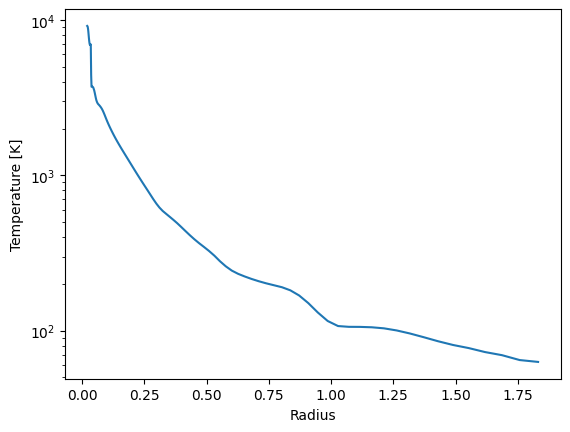

In [63]:
plt.plot(r_c, 66.0*temp[0][-1])
plt.ylabel('Temperature [K]')
plt.xlabel('Radius')

plt.yscale('log')
